<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-prevously-retrieved-Cryptocurrency-Data" data-toc-modified-id="Load-prevously-retrieved-Cryptocurrency-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load prevously retrieved Cryptocurrency Data</a></span></li><li><span><a href="#Data-Understanding-and-Cleaning" data-toc-modified-id="Data-Understanding-and-Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Understanding and Cleaning</a></span><ul class="toc-item"><li><span><a href="#Delete-useless-column" data-toc-modified-id="Delete-useless-column-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Delete useless column</a></span></li><li><span><a href="#Correct-the-datatype" data-toc-modified-id="Correct-the-datatype-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Correct the datatype</a></span></li><li><span><a href="#Survivorship-bias" data-toc-modified-id="Survivorship-bias-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Survivorship bias</a></span></li><li><span><a href="#Understanding-Price,-Market-Capitalization-and-Circulating-Supply" data-toc-modified-id="Understanding-Price,-Market-Capitalization-and-Circulating-Supply-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Understanding Price, Market Capitalization and Circulating Supply</a></span></li><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Missing Values</a></span></li><li><span><a href="#Market-Share" data-toc-modified-id="Market-Share-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Market Share</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#References:" data-toc-modified-id="References:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>References:</a></span></li></ul></div>

# Cryptocurrency Analysis with Python: Understanding and Cleaning Cryptocurrency data (part 1)
Find more tutorials about Computer Vision, Microscopy, Biology and Data Science [here](https://medium.com/@microbioscopicdata)


Welcome back to our tutorial series on Cryptocurrency Analysis with Python! In our previous tutorials, we explored how to use powerful Python libraries such as Matplotlib, mplfinance, and yfinance to load and visualize cryptocurrency data from popular sources like Yahoo Finance. We’ve discussed about cryptocurrency exchanges, trade expenses (visible and hidden costs) and what we should really know about them before you create an account and before you start trading with them. Moreover, we retrieved detailed and in-depth cryptocurrency data from CoinGecko, a popular data aggregator, using Python.

In this first part of our tutorial, our objective is to delve into the data understanding and cleaning process. We will be working with a dataset retrieved from a data aggregator, which contains complex information about various cryptocurrencies. Our primary goal is to carefully prepare and analyze this data to extract valuable insights into the cryptocurrency market. During this process, we will perform crucial data cleaning operations, including dropping unnecessary columns, filling in missing values, and converting specific date columns to datetime objects. Furthermore, we will explore and understand essential concepts such as market capitalization and Survivorship bias.

    
Disclaimer: This article is not financial advice. This is purely introductory knowledge. All investment-related queries should be directed to your financial advisor.



## Load prevously retrieved Cryptocurrency Data


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycoingecko import CoinGeckoAPI
import time
import math

# Set the display option to two decimal places
pd.options.display.float_format = '{:.2f}'.format

The code below reads data from a CSV file named 'all_crypto_data.csv,' retrieved in our previous tutorial ('Cryptocurrency Analysis with Python: Retrieving Crypto Data from CoinGecko' - find it here), into a Pandas DataFrame named df. In the dataframe, each column represents:

- **id**: The unique identifier or name of each cryptocurrency.

- **symbol**: The symbol or ticker symbol associated with each cryptocurrency.

- **name**: The full name or title of each cryptocurrency.

- **image**: A URL pointing to an image or logo representing the cryptocurrency.

- **current_price**: The current market price of the cryptocurrency.

- **market_cap**: The market capitalization of the cryptocurrency, which is the total value of all its circulating coins or tokens. The formula for calculating market cap is: *Market Cap = Current Price × Circulating Supply*

- **market_cap_rank**: The rank of the cryptocurrency based on its market capitalization. It indicates where the cryptocurrency stands relative to others in terms of market value.

- **fully_diluted_valuation**: The fully diluted valuation of the cryptocurrency, which takes into account potential future issuance or supply changes.

- **total_volume**: The total trading volume of the cryptocurrency in the last 24 hours.

- **high_24h**: The highest price of the cryptocurrency observed in the last 24 hours.

- **low_24h**: The lowest price of the cryptocurrency observed in the last 24 hours.

- **price_change_24h**: The change in the cryptocurrency's price over the last 24 hours.

- **price_change_percentage_24h**: The percentage change in the cryptocurrency's price over the last 24 hours.

- **market_cap_change_24h**: The change in the cryptocurrency's market capitalization over the last 24 hours.

- **market_cap_change_percentage_24h**: The percentage change in the cryptocurrency's market capitalization over the last 24 hours.

- **circulating_supply**: The number of coins or tokens currently in circulation for the cryptocurrency.

- **total_supply**: Total supply refers to the total number of coins or tokens that currently exist or have been generated. This includes all tokens that have been mined, created, or issued, regardless of whether they are currently in circulation.
*Example: If a cryptocurrency has a total supply of 100 million tokens and 60 million of those tokens are currently in circulation, the remaining 40 million may be held by the project's creators or reserved for various purposes.*

- **max_supply**: The maximum supply of coins or tokens that can ever be created or mined for a particular cryptocurrency. It's the upper limit, and no additional tokens can be generated beyond this number.

- **ath**: The all-time high (highest price ever reached) for the cryptocurrency.

- **ath_change_percentage**: The percentage change from the all-time high to the current price.

- **ath_date**: The date when the cryptocurrency reached its all-time high.

- **atl**: The all-time low (lowest price ever reached) for the cryptocurrency.

- **atl_change_percentage**: The percentage change from the all-time low to the current price.

- **atl_date**: The date when the cryptocurrency reached its all-time low.
- **roi**: Return on investment data for the cryptocurrency.

- **last_updated**: The date and time when this data was last updated.

In [2]:
# Read the CSV file  named "all_crypto_data.csv"
df = pd.read_csv("all_crypto_data.csv")
df

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,24364.00,474520923430.00,1.00,511916601833.00,16246140503.00,24433.00,...,21000000.00,21000000.00,59717.00,-59.18,2021-11-10T14:24:11.849Z,51.30,47414.54,2013-07-05T00:00:00.000Z,NaN,2023-08-23T18:42:47.046Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1546.27,185987617154.00,2.00,185987617154.00,11872679879.00,1553.38,...,120214313.22,NaN,4228.93,-63.42,2021-12-01T08:38:24.623Z,0.38,405435.73,2015-10-20T00:00:00.000Z,"{'times': 83.84405195701511, 'currency': 'btc'...",2023-08-23T18:42:50.617Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.92,76220647448.00,3.00,76220647448.00,14146803743.00,0.93,...,82845776808.29,NaN,1.13,-18.70,2018-07-24T00:00:00.000Z,0.53,72.58,2015-03-02T00:00:00.000Z,NaN,2023-08-23T18:40:00.329Z
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,199.99,30778531852.00,4.00,40009491790.00,661259225.00,200.63,...,153856150.00,200000000.00,583.17,-65.70,2021-11-26T02:58:28.000Z,0.03,595218.98,2017-10-19T00:00:00.000Z,NaN,2023-08-23T18:42:50.796Z
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.49,25770400977.00,5.00,48702246501.00,933292698.00,0.49,...,99988485729.00,100000000000.00,2.82,-82.75,2018-01-07T00:00:00.000Z,0.00,24921.87,2013-08-16T00:00:00.000Z,NaN,2023-08-23T18:42:47.909Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10145,cola-token-2,cola,Cola Token,https://assets.coingecko.com/coins/images/3093...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN
10146,fiero,fiero,Fiero,https://assets.coingecko.com/coins/images/3036...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN
10147,amplifi-dao,agg,AmpliFi DAO,https://assets.coingecko.com/coins/images/2913...,NaN,NaN,NaN,NaN,NaN,NaN,...,3000000000.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN
10148,ayin,ayin,Ayin,https://assets.coingecko.com/coins/images/3131...,NaN,NaN,NaN,NaN,NaN,NaN,...,192459.00,4000000.00,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10150 entries, 0 to 10149
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                10150 non-null  object 
 1   symbol                            10150 non-null  object 
 2   name                              10150 non-null  object 
 3   image                             10150 non-null  object 
 4   current_price                     9747 non-null   float64
 5   market_cap                        9692 non-null   float64
 6   market_cap_rank                   3649 non-null   float64
 7   fully_diluted_valuation           8791 non-null   float64
 8   total_volume                      9629 non-null   float64
 9   high_24h                          7109 non-null   float64
 10  low_24h                           7109 non-null   float64
 11  price_change_24h                  7109 non-null   float64
 12  pric

The result of the `df.info()` function provides important information about the DataFrame and its columns. We understand that:

 - We have 10,150 entries/coins (from 0 to 10149)  

- Most columns have missing values, as indicated by the difference between the 'RangeIndex' (10150) count and the 'Non-Null Count.' For example, the non-null count for the 'current_price' column is 9747, meaning that there are 403 missing values for this column (10150 - 9747).  

- The column `roi` has a relatively low count of non-null values (383 out of 10,150), indicating that it contains a significant amount of missing data.








## Data Understanding and Cleaning
In this section, we will delve into specific aspects of data understanding and cleaning to address the most critical errors and inconsistencies. It's essential to keep in mind that data cleaning often involves discretionary steps, and there may not always be a definitive right or wrong approach. The cleaning process should align with your intended use of the data.

For instance, if our analysis heavily relies on price information, you might consider removing coins with missing price data from the dataset. However, this is not a mandatory step. Price is just one of many attributes of a cryptocurrency, and if it's not a critical component for your analysis, you can choose to retain coins with missing price information. There's no universally correct or incorrect path.

The following cleaning process is presented as an example of how it can be executed. The specific steps you take will depend on your analysis goals and the significance of various data attributes to your project.

### Delete useless column
Due to missing  data, removing the `roi` column is a reasonable choice.

In [4]:
# Drop the "roi" column from the DataFrame
df.drop(columns=["roi"], inplace=True)

### Correct the datatype
Another usefull process is to convert the columns with date information to the datetime data type using `pd.to_datetime`. By doing this, we'll be able to perform various date-related operations and analyses on these columns (see below).


In [5]:
# Fill missing values with np.nan
df.fillna(np.nan, inplace=True)

columns_with_dates = ['ath_date','atl_date', 'last_updated']
# columns_with_dates = ['atl_date']


# Using errors='coerce' force the conversion and replacement of unparseable dates with NaT (Not a Timestamp)
for column in columns_with_dates:
    df[column] = pd.to_datetime(df[column], errors='coerce', utc=True)



![](daytime.jpg)

### Survivorship bias
Once correct the data type we can take a closer look at the `last updated` column; analyzing it in detail can provide valuable insights. We'll start by sorting the dates from the oldest to the most recent using the `sort_values` function.

In [7]:
df.sort_values(by="last_updated", ascending=True)

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,last_updated
3928,scopecoin,xscp,ScopeCoin,https://assets.coingecko.com/coins/images/7919...,0.00,0.00,NaN,2700.49,5.93,NaN,...,0.00,18000000.00,NaN,0.02,-99.08,2019-03-07 04:52:27.217000+00:00,0.00,194.08,2019-05-04 00:00:00+00:00,2020-01-08 11:32:11.543000+00:00
8713,cryptogcoin,crg,Cryptogcoin,https://assets.coingecko.com/coins/images/1035...,0.00,0.00,NaN,21602.00,59.06,NaN,...,0.00,800000000.00,NaN,0.00,-99.43,2020-01-09 07:24:10.110000+00:00,0.00,198.79,2020-11-19 04:06:55.610000+00:00,2021-03-09 11:31:35.302000+00:00
8665,cryptogcoin,crg,Cryptogcoin,https://assets.coingecko.com/coins/images/1035...,0.00,0.00,NaN,21602.00,59.06,NaN,...,0.00,800000000.00,NaN,0.00,-99.43,2020-01-09 07:24:10.110000+00:00,0.00,198.79,2020-11-19 04:06:55.610000+00:00,2021-03-09 11:31:35.302000+00:00
4611,charity-alfa,mich,Charity Alfa,https://assets.coingecko.com/coins/images/1038...,0.00,0.00,NaN,9783.03,7.71,NaN,...,0.00,1000000000.00,NaN,0.00,-95.97,2020-01-11 10:05:01.596000+00:00,0.00,77.74,2021-05-20 15:58:20.463000+00:00,2021-06-04 14:14:49.318000+00:00
8422,alliance-x-trading,axt,Alliance X Trading,https://assets.coingecko.com/coins/images/1112...,0.00,0.00,NaN,1804307.00,2.42,NaN,...,0.00,1000000000.00,NaN,2.46,-99.93,2021-04-29 21:20:56.258000+00:00,0.00,66.88,2020-08-29 23:48:42.830000+00:00,2021-06-08 05:46:35.823000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10145,cola-token-2,cola,Cola Token,https://assets.coingecko.com/coins/images/3093...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,NaT,NaN,0.00,NaT,NaT
10146,fiero,fiero,Fiero,https://assets.coingecko.com/coins/images/3036...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.00,NaT,NaN,0.00,NaT,NaT
10147,amplifi-dao,agg,AmpliFi DAO,https://assets.coingecko.com/coins/images/2913...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3000000000.00,NaN,NaN,0.00,NaT,NaN,0.00,NaT,NaT
10148,ayin,ayin,Ayin,https://assets.coingecko.com/coins/images/3131...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,192459.00,4000000.00,NaN,0.00,NaT,NaN,0.00,NaT,NaT


From the sorted dataframe above, we observe coins that haven't seen updates for quite some time. For instance, the last update for ScopeCoin (XSCP) was back in January 2020. Typically, for actively traded coins, we would expect the last update to be more recent. However, there are also coins that haven't seen updates for an extended period, often because they are no longer actively traded or there is no new market data available. Exchanges commonly delist coins, especially those that have experienced significant price drops, fraud, or other controversies.  

When working with data from a specific exchange like Binance, you may not find data on removed coins. This phenomenon leads to what's known as **survivorship bias**, a common and significant issue in finance and investing. *Survivorship bias occurs because datasets typically include only the 'surviving' assets, omitting information about those that failed. This isn't unique to the crypto market; it's a challenge in the stock market as well*[1]. This pehomen can lead to incorrect or biased results, particularly in world of cryptos.That's one of the reasons why we prefer to work with data aggregators. These aggregators tend to include data on failed coins, reducing survivorship bias.

Let's illustrate this with an example [2]. Take the case of `Monetha (MTH)`, a coin that experienced a significant hype in 2018 but was removed from Binance in early 2022 [3]. As a result, you won't find much data on Monetha within Binance, but CoinGecko provides a more comprehensive dataset, including information on where you can still trade Monetha, despite its removal from Binance.

In [8]:
# Filter the DataFrame based on the condition df["name"] == "Monetha"
df[df["name"] == "Monetha"]

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,last_updated
1759,monetha,mth,Monetha,https://assets.coingecko.com/coins/images/902/...,0.00,1280111.00,1761.00,1482162.00,140054.00,0.00,...,347543900.00,402400000.00,NaN,0.50,-99.26,2018-01-10 00:00:00+00:00,0.00,333.13,2022-03-13 07:51:26.329000+00:00,2023-08-23 18:44:31.081000+00:00


![](monetha.jpg)

### Understanding Price, Market Capitalization and Circulating Supply

**Market Capitalization = Price  x Circulating Supply**  

In the code below we can observe that a total of **6043** coins have a market capitalization of zero. This situation can typically be attributed to one of two reasons:

- when the price of a coin is zero.
- when its circulating supply is zero (these coins can only be bought and sold in private transactions, not on exchanges).


In [9]:
df["market_cap"].value_counts()

0.00          6043
81498.00         2
24332.00         2
321733.00        1
331104.00        1
              ... 
4168853.00       1
4165877.00       1
4162850.00       1
4155020.00       1
1135275.00       1
Name: market_cap, Length: 3648, dtype: int64

The code below identifys and analyzes rows in the DataFrame where the market capitalization (market_cap) is zero and then check how many of these rows have both the "current_price" and "circulating_supply" equal to zero. This analysis helps identify cases where coins have zero market capitalization because they are either not actively traded (zero price - found 10 coins) or not available to the public (zero circulating supply - found 6042 coins).

In [10]:
# Filter the DataFrame for rows where market_cap is zero, and select the columns "current_price" and "circulating_supply"
market_cap_zero = df.loc[df["market_cap"]==0,["current_price","circulating_supply"]]

# Check how many rows have both "current_price" and "circulating_supply" equal to zero
(market_cap_zero == 0).sum()

current_price           10
circulating_supply    6042
dtype: int64

### Missing Values

From the  `df.info()` function we have found above that the columns: `current_price, market_cap, fully_diluted_valuation, total_volume, high_24h, low_24h, price_change_24h, price_change_percentage_24h, market_cap_change_24h, market_cap_change_percentage_24h, circulating_supply, ath, atl` have missing values. With the column `market_cap_rank` having more than 6,500 missing values.

In [11]:
# Find missing values using the isna() method followed by the sum() method/''
missing_values = df.isna().sum()
missing_values.sort_values(ascending=False)

market_cap_rank                     6501
max_supply                          4637
price_change_24h                    3041
low_24h                             3041
price_change_percentage_24h         3041
high_24h                            3041
market_cap_change_24h               3040
market_cap_change_percentage_24h    3040
fully_diluted_valuation             1359
total_supply                        1127
total_volume                         521
ath                                  460
atl                                  460
atl_date                             460
ath_date                             460
market_cap                           458
circulating_supply                   458
current_price                        403
last_updated                         381
ath_change_percentage                  0
symbol                                 0
image                                  0
atl_change_percentage                  0
name                                   0
id              

Based on the code above, we can observe that there are approximately 1,200 missing values in the 'total_supply' column and roughly 4,500 missing values in the 'Max Supply' column. This implies that more than 4,500 coins have an unlimited number of mineable coins, which is a significant characteristic to consider when evaluating a coin's properties.

We can filter the DataFrame for all coins that have a maximum number of mineable coins. With this filter, we have all 5,513 coins (see below). For example, Bitcoin has a limited number of coins, specifically 21 million.

In [12]:
# Filter the DataFrame to include only rows where the 'max_supply' column is not empty
df[df["max_supply"].notna()]

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,24364.00,474520923430.00,1.00,511916601833.00,16246140503.00,24433.00,...,19465943.00,21000000.00,21000000.00,59717.00,-59.18,2021-11-10 14:24:11.849000+00:00,51.30,47414.54,2013-07-05 00:00:00+00:00,2023-08-23 18:42:47.046000+00:00
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,199.99,30778531852.00,4.00,40009491790.00,661259225.00,200.63,...,153856150.00,153856150.00,200000000.00,583.17,-65.70,2021-11-26 02:58:28+00:00,0.03,595218.98,2017-10-19 00:00:00+00:00,2023-08-23 18:42:50.796000+00:00
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.49,25770400977.00,5.00,48702246501.00,933292698.00,0.49,...,52914193551.00,99988485729.00,100000000000.00,2.82,-82.75,2018-01-07 00:00:00+00:00,0.00,24921.87,2013-08-16 00:00:00+00:00,2023-08-23 18:42:47.909000+00:00
6,staked-ether,steth,Lido Staked Ether,https://assets.coingecko.com/coins/images/1344...,1546.49,12887619261.00,7.00,12887619261.00,42239612.00,1553.99,...,8329548.74,8329651.75,8329651.75,4188.52,-62.99,2021-11-12 02:16:02.325000+00:00,394.87,292.61,2020-12-22 04:08:21.854000+00:00,2023-08-23 18:42:46.473000+00:00
7,cardano,ada,Cardano,https://assets.coingecko.com/coins/images/975/...,0.25,8608985346.00,8.00,11054475968.00,175492181.00,0.25,...,35045020830.32,45000000000.00,45000000000.00,2.61,-90.58,2021-09-02 06:00:10.474000+00:00,0.02,1326.16,2020-03-13 02:22:55.044000+00:00,2023-08-23 18:42:42.550000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10141,nexus-asa,gp,Nexus ASA,https://assets.coingecko.com/coins/images/2682...,0.00,NaN,NaN,864235.00,8.89,NaN,...,NaN,10000000000.00,10000000000.00,NaN,0.00,NaT,NaN,0.00,NaT,2023-08-23 18:58:54.826000+00:00
10143,smurfsinu,smurf,SmurfsINU,https://assets.coingecko.com/coins/images/2680...,0.00,NaN,NaN,217284.00,2.95,NaN,...,NaN,1000000000000000.00,1000000000000000.00,NaN,0.00,NaT,NaN,0.00,NaT,2023-08-03 10:30:28.094000+00:00
10144,dexfi-governance,gdex,DexFi Governance,https://assets.coingecko.com/coins/images/3067...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,120000.00,120000.00,NaN,0.00,NaT,NaN,0.00,NaT,NaT
10148,ayin,ayin,Ayin,https://assets.coingecko.com/coins/images/3131...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,192459.00,4000000.00,NaN,0.00,NaT,NaN,0.00,NaT,NaT


### Market Share

Next, let's delve into the global total market capitalization.

The global market capitalization represents the sum of the market capitalization of all projects or coins in the cryptocurrency market.

We can easily calculate the global market cap using the Coingecko dataset. By selecting the `market_cap` column and applying the `sum` method, we obtain the **total market cap**. For instance, in our dataset, as of August 2023, the total market capitalization amounts to 1.02 trillion EUR.


In [17]:
# Calculates the total market capitalization
total_market_cap = df["market_cap"].sum()
total_market_cap

1020954449295.0121

Now, let's consider **individual market shares**. We know that, Bitcoin and Ethereum hold substantial dominance in the market. To calculate the market share for all coins, we can use vectorized operations. We divide each coin's market cap by the total market cap (calculated above) and multiply the result by 100 to express it as a percentage. We'll create a new column named `market_share` in our DataFrame to store these values.

In [14]:
df["market_share"]= df["market_cap"].div(total_market_cap).mul(100)
df.head()

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,last_updated,market_share
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,24364.00,474520923430.00,1.00,511916601833.00,16246140503.00,24433.00,...,21000000.00,21000000.00,59717.00,-59.18,2021-11-10 14:24:11.849000+00:00,51.30,47414.54,2013-07-05 00:00:00+00:00,2023-08-23 18:42:47.046000+00:00,46.48
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,1546.27,185987617154.00,2.00,185987617154.00,11872679879.00,1553.38,...,120214313.22,NaN,4228.93,-63.42,2021-12-01 08:38:24.623000+00:00,0.38,405435.73,2015-10-20 00:00:00+00:00,2023-08-23 18:42:50.617000+00:00,18.22
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.92,76220647448.00,3.00,76220647448.00,14146803743.00,0.93,...,82845776808.29,NaN,1.13,-18.70,2018-07-24 00:00:00+00:00,0.53,72.58,2015-03-02 00:00:00+00:00,2023-08-23 18:40:00.329000+00:00,7.47
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,199.99,30778531852.00,4.00,40009491790.00,661259225.00,200.63,...,153856150.00,200000000.00,583.17,-65.70,2021-11-26 02:58:28+00:00,0.03,595218.98,2017-10-19 00:00:00+00:00,2023-08-23 18:42:50.796000+00:00,3.01
4,ripple,xrp,XRP,https://assets.coingecko.com/coins/images/44/l...,0.49,25770400977.00,5.00,48702246501.00,933292698.00,0.49,...,99988485729.00,100000000000.00,2.82,-82.75,2018-01-07 00:00:00+00:00,0.00,24921.87,2013-08-16 00:00:00+00:00,2023-08-23 18:42:47.909000+00:00,2.52


With the above code, we calculate and find that Bitcoin holds a market share of 34.48%, followed by Ethereum and other coins. Additionally, we can compute the cumulative market share by summing the market shares, starting from Bitcoin and progressing through the rankings.

As you can see from the code below, Bitcoin and Ethereum combined hold a market share of 56.77%, while the top ten coins collectively contribute 83.74% to the total market capitalization. This analysis highlights the high concentration of value within the cryptocurrency market, where a relatively small number of top coins dominate the majority of the market's capitalization.

In [18]:
df["market_share"].cumsum().head(10)

0   46.48
1   64.70
2   72.16
3   75.18
4   77.70
5   80.04
6   81.30
7   82.14
8   82.95
9   83.74
Name: market_share, dtype: float64

Finally, let's visualize the significant concentration of value among a small number of coins that dominate the market's capitalization.

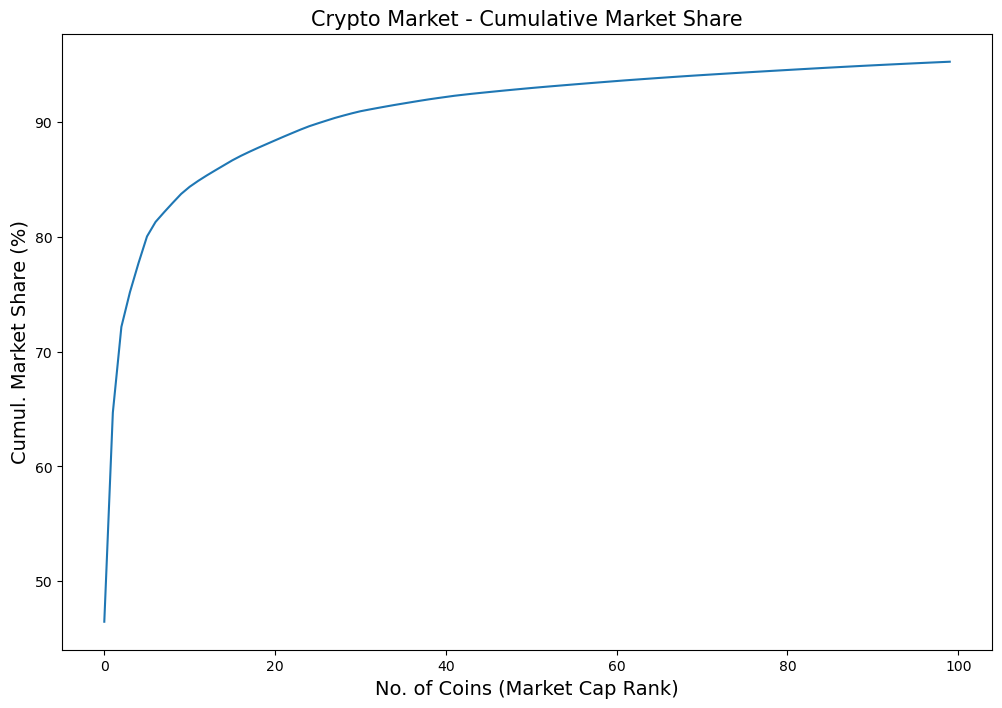

In [19]:
df.iloc[0:100].market_share.cumsum().plot(figsize = (12, 8))
plt.title("Crypto Market - Cumulative Market Share", fontsize = 15)
plt.xlabel("No. of Coins (Market Cap Rank)", fontsize = 14)
plt.ylabel("Cumul. Market Share (%)", fontsize = 14)
plt.show()

## Conclusion

In this data understanding and cleaning process, we successfully prepared our dataset for analysis by dropping unnecessary columns, filling missing values, and converting date columns. We explored the concept of Survivorship bias, market capitalization, and identified coins with zero market capitalization due to zero prices or zero circulating supplies.

In our next part, we will delve into reconstructing our dataframe by retaining the most informative columns, finding duplicates, and many more...

If you enjoy reading stories of this nature and wish to show your support for my writing, you may contemplate becoming a Medium member. By subscribing for just $5 per month, you’ll gain boundless entry to a vast collection of Python guides and Data science articles. Additionally, if you choose to sign up through my referral link, I’ll receive a modest commission with no extra cost to you.




## References:
[1]	“Survivorship bias has led to an imbalance in the crypto ecosystem,” Cointelegraph, Oct. 09, 2021. https://cointelegraph.com/news/survivorship-bias-has-led-to-an-imbalance-in-the-crypto-ecosystem (accessed Aug. 25, 2023).  

[2]	“Automated Cryptocurrency Portfolio Investing with Python A-Z,” Udemy. https://www.udemy.com/course/automated-cryptocurrency-portfolio-investing-with-python/ (accessed Apr. 01, 2023).  

[3]	“Binance Will Delist BCD, CND, MTH, NCASH and YOYO on 2022-03-08 | Binance Support.” https://www.binance.com/en/support/search?type=2&q=+forget++passes (accessed Aug. 25, 2023).

